In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

In [3]:
class agent:
    pass

In [4]:
ag = agent()
ag.type = np.random.randint(2)
ag.x = np.random.random()
ag.y = np.random.random()

In [5]:
ag.__dict__

{'type': 1, 'x': 0.9554129164029269, 'y': 0.901143366863084}

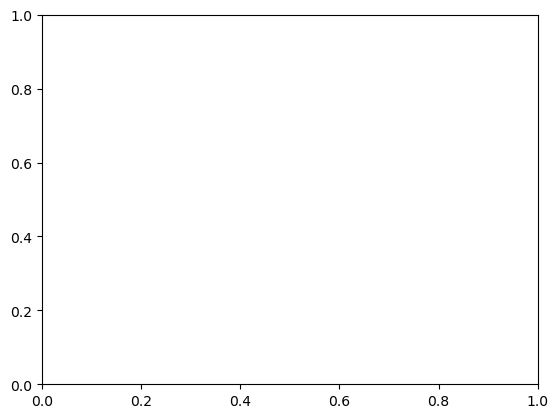

In [6]:
class agent:
    pass

def distance(ag, nb):
    return  (ag.x - nb.x)**2 + (ag.y - nb.y)**2

n = 1000 # number of agents
r = 0.1 # neighborhood radius
th = 0.5 # threshold for moving

agents = []

for _ in range(n):
    ag = agent()
    ag.type = np.random.randint(2)
    ag.x = np.random.random()
    ag.y = np.random.random()
    agents.append(ag)
    
# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(6,6))
plt.close()

# simulate
def animate(frame):
    global agents
    ax.clear()
    
    ag = agents[np.random.randint(n)]
    neighbors = [nb for nb in agents if distance(ag, nb) < r**2 and nb != ag]
    
    if len(neighbors) > 0:
        q = len([nb for nb in neighbors if nb.type == ag.type]) / float(len(neighbors))
        
        if q < th:
            ag.x, ag.y = np.random.random(), np.random.random()
            
    white = [ag for ag in agents if ag.type == 0]
    black = [ag for ag in agents if ag.type == 1]
    
    ax.plot([ag.x for ag in white], [ag.y for ag in white], 'wo', markeredgewidth=1, markeredgecolor='b')
    ax.plot([ag.x for ag in black], [ag.y for ag in black], 'ko', markeredgewidth=1, markeredgecolor='b')
    ax.axis('image')
    ax.axis([0, 1, 0, 1])

In [7]:
anim = animation.FuncAnimation(fig, animate, frames=3000, interval=20)

In [8]:
anim